# Numerical Methods for ODEs — Notes
Jonathan Ma

In [1]:
### Setup: Dependencies

using Pkg

packages = [
    "DifferentialEquations",
    "Plots",
    "BenchmarkTools"
]

for pkg in packages
    if !haskey(Pkg.project().dependencies, pkg)
        Pkg.add(pkg)
    end
end

using DifferentialEquations
using Plots
using BenchmarkTools

## 1. Fundamentals

### 1.1 Initial Value Problems (IVPs) vs. Boundary Value Problems (BVPs)

- **Initial Value Problem (IVP)**  
  An ordinary differential equation (ODE) together with initial conditions specified at a single point:  
  $ \frac{dy}{dt} = f(t, y), \quad y(t_0) = y_0 $  
  Goal: determine $ y(t) $ for $ t $ in some interval containing $ t_0 $.

- **Boundary Value Problem (BVP)**  
  An ODE with solution values specified at two or more points:  
  $ \frac{d^2y}{dt^2} = f(t, y, y'), \quad y(a) = \alpha, \quad y(b) = \beta $  
  Often solved using methods such as shooting, finite differences, or finite elements.

---

### 1.2 Existence & Uniqueness Theorem (Picard–Lindelöf)

If $ f(t, y) $ and $ \frac{\partial f}{\partial y} $ are continuous in a rectangle  
$ R = \{ (t, y) : |t - t_0| \le a, \ |y - y_0| \le b \} $  
then there exists a unique solution $ y(t) $ to the IVP  
$ \frac{dy}{dt} = f(t, y), \quad y(t_0) = y_0 $  
in some interval around $ t_0 $.

---

### 1.3 Classification of ODEs

- **Order**  
  Determined by the highest derivative present in the equation.  
  Example: $ y'' + y = 0 $ is second-order.

- **Linear vs. Nonlinear**  
  - *Linear:* $ y' + p(t) y = q(t) $  
  - *Nonlinear:* $ y' = y^2 + t $

- **Autonomous vs. Non-autonomous**  
  - *Autonomous:* $ y' = f(y) $ — no explicit dependence on $ t $.  
  - *Non-autonomous:* $ y' = f(t, y) $ — explicit $ t $ dependence.

## 2. Basic Numerical Methods

### 2.1 Euler Method (Explicit)

**Derivation**  
Start from the ODE $ \frac{dy}{dt} = f(t, y) $.  
Approximate the derivative by a forward difference:  
$ \frac{y_{n+1} - y_n}{h} \approx f(t_n, y_n) $  
Rearranging:  
$ y_{n+1} = y_n + h \, f(t_n, y_n) $

**Algorithm**  
1. Choose initial condition $ y_0 $ and step size $ h $.  
2. For $ n = 0, 1, \dots $ update:  
   $ y_{n+1} = y_n + h \, f(t_n, y_n) $

In [2]:
# 2.1 Euler Method (Explicit)
function euler(f, t0, y0, h, steps)
    t = [t0 + i*h for i in 0:steps]
    y = zeros(Float64, steps+1)
    y[1] = y0
    for n in 1:steps
        y[n+1] = y[n] + h * f(t[n], y[n])
    end
    return t, y
end

f(t, y) = -2y
t, y = euler(f, 0.0, 1.0, 0.1, 20)
for (ti, yi) in zip(t, y)
    println("t = $ti, y ≈ $yi")
end

t = 0.0, y ≈ 1.0
t = 0.1, y ≈ 0.8
t = 0.2, y ≈ 0.64
t = 0.30000000000000004, y ≈ 0.512
t = 0.4, y ≈ 0.4096
t = 0.5, y ≈ 0.32768
t = 0.6000000000000001, y ≈ 0.26214400000000004
t = 0.7000000000000001, y ≈ 0.20971520000000005
t = 0.8, y ≈ 0.16777216000000003
t = 0.9, y ≈ 0.13421772800000004
t = 1.0, y ≈ 0.10737418240000003
t = 1.1, y ≈ 0.08589934592000002
t = 1.2000000000000002, y ≈ 0.06871947673600001
t = 1.3, y ≈ 0.05497558138880001
t = 1.4000000000000001, y ≈ 0.04398046511104001
t = 1.5, y ≈ 0.035184372088832
t = 1.6, y ≈ 0.028147497671065603
t = 1.7000000000000002, y ≈ 0.02251799813685248
t = 1.8, y ≈ 0.018014398509481985
t = 1.9000000000000001, y ≈ 0.014411518807585589
t = 2.0, y ≈ 0.01152921504606847


### 2.2 Backward Euler Method (Implicit)

**Derivation**  
$ \frac{y_{n+1} - y_n}{h} \approx f(t_{n+1}, y_{n+1}) $  
Rearranging:  
$ y_{n+1} = y_n + h \, f(t_{n+1}, y_{n+1}) $  
This is **implicit** because $ y_{n+1} $ appears on both sides and must be solved at each step.

**Algorithm**  
1. Choose $ y_0 $ and $ h $.  
2. At each step, solve:  
   $ y_{n+1} - h \, f(t_{n+1}, y_{n+1}) = y_n $  
   (Use Newton's method for nonlinear $f$.)

**Stability**  
Backward Euler is **A-stable**, meaning it is stable for all $ h > 0 $ when applied to the test equation $ y' = \lambda y $ with $\text{Re}(\lambda) < 0$.

In [3]:
function backward_euler_linear(lambda, t0, y0, h, steps)
    t = [t0 + i*h for i in 0:steps]
    y = zeros(Float64, steps+1)
    y[1] = y0
    for n in 1:steps
        y[n+1] = y[n] / (1 - h*lambda)
    end
    return t, y
end

lambda = -2.0
t, y = backward_euler_linear(lambda, 0.0, 1.0, 0.1, 20)
for (ti, yi) in zip(t, y)
    println("t = $ti, y ≈ $yi")
end

t = 0.0, y ≈ 1.0
t = 0.1, y ≈ 0.8333333333333334
t = 0.2, y ≈ 0.6944444444444445
t = 0.30000000000000004, y ≈ 0.5787037037037038
t = 0.4, y ≈ 0.48225308641975323
t = 0.5, y ≈ 0.401877572016461
t = 0.6000000000000001, y ≈ 0.3348979766803842
t = 0.7000000000000001, y ≈ 0.2790816472336535
t = 0.8, y ≈ 0.2325680393613779
t = 0.9, y ≈ 0.19380669946781492
t = 1.0, y ≈ 0.1615055828898458
t = 1.1, y ≈ 0.13458798574153816
t = 1.2000000000000002, y ≈ 0.11215665478461513
t = 1.3, y ≈ 0.09346387898717928
t = 1.4000000000000001, y ≈ 0.07788656582264941
t = 1.5, y ≈ 0.06490547151887452
t = 1.6, y ≈ 0.05408789293239544
t = 1.7000000000000002, y ≈ 0.045073244110329536
t = 1.8, y ≈ 0.037561036758607946
t = 1.9000000000000001, y ≈ 0.031300863965506624
t = 2.0, y ≈ 0.026084053304588854


### 2.3 Midpoint Method

**Derivation**  
Use slope at midpoint of interval:  
$ k_1 = f(t_n, y_n) $  
$ k_2 = f\left(t_n + \frac{h}{2}, \; y_n + \frac{h}{2} k_1 \right) $  
$ y_{n+1} = y_n + h \, k_2 $

**Algorithm**  
1. Compute slope at the start of the interval.  
2. Estimate slope at midpoint.  
3. Use midpoint slope to advance the solution.

In [4]:
# 2.3 Midpoint Method
function midpoint(f, t0, y0, h, steps)
    t = [t0 + i*h for i in 0:steps]
    y = zeros(Float64, steps+1)
    y[1] = y0
    for n in 1:steps
        k1 = f(t[n], y[n])
        k2 = f(t[n] + h/2, y[n] + h/2 * k1)
        y[n+1] = y[n] + h * k2
    end
    return t, y
end

f(t, y) = -2y
t, y = midpoint(f, 0.0, 1.0, 0.1, 20)
for (ti, yi) in zip(t, y)
    println("t = $ti, y ≈ $yi")
end

t = 0.0, y ≈ 1.0
t = 0.1, y ≈ 0.82
t = 0.2, y ≈ 0.6723999999999999
t = 0.30000000000000004, y ≈ 0.5513679999999999
t = 0.4, y ≈ 0.4521217599999999
t = 0.5, y ≈ 0.37073984319999986
t = 0.6000000000000001, y ≈ 0.3040066714239999
t = 0.7000000000000001, y ≈ 0.2492854705676799
t = 0.8, y ≈ 0.20441408586549753
t = 0.9, y ≈ 0.16761955040970797
t = 1.0, y ≈ 0.13744803133596054
t = 1.1, y ≈ 0.11270738569548763
t = 1.2000000000000002, y ≈ 0.09242005627029987
t = 1.3, y ≈ 0.0757844461416459
t = 1.4000000000000001, y ≈ 0.062143245836149635
t = 1.5, y ≈ 0.0509574615856427
t = 1.6, y ≈ 0.04178511850022701
t = 1.7000000000000002, y ≈ 0.03426379717018615
t = 1.8, y ≈ 0.02809631367955264
t = 1.9000000000000001, y ≈ 0.023038977217233164
t = 2.0, y ≈ 0.018891961318131194


### 2.4 Modified Euler / Heun’s Method

**Predictor–Corrector View**  
Predictor: $ y^* = y_n + h \, f(t_n, y_n) $  
Corrector: $ y_{n+1} = y_n + \frac{h}{2} \left[ f(t_n, y_n) + f(t_{n+1}, y^*) \right] $

**Algorithm**  
1. Take a trial (predictor) step using the Euler method.  
2. Correct the value by averaging slopes at $t_n$ and $t_{n+1}$.

In [5]:
# 2.4 Modified Euler / Heun’s Method
function heun(f, t0, y0, h, steps)
    t = [t0 + i*h for i in 0:steps]
    y = zeros(Float64, steps+1)
    y[1] = y0
    for n in 1:steps
        yp = y[n] + h * f(t[n], y[n])  # predictor
        y[n+1] = y[n] + h/2 * (f(t[n], y[n]) + f(t[n+1], yp))
    end
    return t, y
end

f(t, y) = -2y
t, y = heun(f, 0.0, 1.0, 0.1, 20)
for (ti, yi) in zip(t, y)
    println("t = $ti, y ≈ $yi")
end

t = 0.0, y ≈ 1.0
t = 0.1, y ≈ 0.82
t = 0.2, y ≈ 0.6723999999999999
t = 0.30000000000000004, y ≈ 0.5513679999999999
t = 0.4, y ≈ 0.4521217599999999
t = 0.5, y ≈ 0.37073984319999986
t = 0.6000000000000001, y ≈ 0.3040066714239999
t = 0.7000000000000001, y ≈ 0.2492854705676799
t = 0.8, y ≈ 0.20441408586549753
t = 0.9, y ≈ 0.16761955040970797
t = 1.0, y ≈ 0.13744803133596054
t = 1.1, y ≈ 0.11270738569548763
t = 1.2000000000000002, y ≈ 0.09242005627029987
t = 1.3, y ≈ 0.0757844461416459
t = 1.4000000000000001, y ≈ 0.062143245836149635
t = 1.5, y ≈ 0.0509574615856427
t = 1.6, y ≈ 0.04178511850022701
t = 1.7000000000000002, y ≈ 0.03426379717018615
t = 1.8, y ≈ 0.02809631367955264
t = 1.9000000000000001, y ≈ 0.023038977217233164
t = 2.0, y ≈ 0.018891961318131194


### 2.5 Runge–Kutta Family

**RK2 (Midpoint form)**  
$ k_1 = f(t_n, y_n) $  
$ k_2 = f(t_n + h/2, y_n + h/2 \, k_1) $  
$ y_{n+1} = y_n + h \, k_2 $

**RK4 (classical)**  
$ k_1 = f(t_n, y_n) $  
$ k_2 = f(t_n + h/2, y_n + h/2 \, k_1) $  
$ k_3 = f(t_n + h/2, y_n + h/2 \, k_2) $  
$ k_4 = f(t_n + h, y_n + h \, k_3) $  
$ y_{n+1} = y_n + \frac{h}{6} (k_1 + 2k_2 + 2k_3 + k_4) $

**Adaptive RK (RKF45)**  
Combines 4th- and 5th-order Runge–Kutta methods to estimate local error and adjust $h$ dynamically.

**Algorithm**  
1. Compute solution using both 4th- and 5th-order formulas.  
2. Estimate local error from the difference.  
3. Adjust $h$ accordingly.

In [6]:
# 2.5 Runge–Kutta 4 (classical)
function rk4(f, t0, y0, h, steps)
    t = [t0 + i*h for i in 0:steps]
    y = zeros(Float64, steps+1)
    y[1] = y0
    for n in 1:steps
        k1 = f(t[n], y[n])
        k2 = f(t[n] + h/2, y[n] + h/2 * k1)
        k3 = f(t[n] + h/2, y[n] + h/2 * k2)
        k4 = f(t[n] + h, y[n] + h * k3)
        y[n+1] = y[n] + h/6 * (k1 + 2k2 + 2k3 + k4)
    end
    return t, y
end

f(t, y) = -2y
t, y = rk4(f, 0.0, 1.0, 0.1, 20)
for (ti, yi) in zip(t, y)
    println("t = $ti, y ≈ $yi")
end

t = 0.0, y ≈ 1.0
t = 0.1, y ≈ 0.8187333333333333
t = 0.2, y ≈ 0.670324271111111
t = 0.30000000000000004, y ≈ 0.548816824901037
t = 0.4, y ≈ 0.44933462844064237
t = 0.5, y ≈ 0.36788523812530194
t = 0.6000000000000001, y ≈ 0.30119990729445556
t = 0.7000000000000001, y ≈ 0.24660240409888057
t = 0.8, y ≈ 0.20190160831589016
t = 0.9, y ≈ 0.1653035767818298
t = 1.0, y ≈ 0.13533954843051013
t = 1.1, y ≈ 0.11080699961833966
t = 1.2000000000000002, y ≈ 0.09072138415418862
t = 1.3, y ≈ 0.07427662125317269
t = 1.4000000000000001, y ≈ 0.060812745707347585
t = 1.5, y ≈ 0.04978942200212905
t = 1.6, y ≈ 0.04076425944054312
t = 1.7000000000000002, y ≈ 0.03337505801262067
t = 1.8, y ≈ 0.027325272496866296
t = 1.9000000000000001, y ≈ 0.022372111435601
t = 2.0, y ≈ 0.01831679336937439


## 3. Multistep Methods

### 3.1 Adams–Bashforth (Explicit)

**General Form**  
The $k$-step Adams–Bashforth method uses previous $k$ points to estimate the derivative:  

$ y_{n+1} = y_n + h \sum_{j=0}^{k-1} b_j \, f(t_{n-j}, y_{n-j}) $

For example, the **2-step Adams–Bashforth method** is:  

$ y_{n+1} = y_n + \frac{h}{2} \left[ 3 f(t_n, y_n) - f(t_{n-1}, y_{n-1}) \right] $

**Notes**  
- Explicit → no need to solve an equation at each step.  
- Requires starting values from another method (e.g., RK4).

In [7]:
# 3.1 Adams–Bashforth 2-step (Explicit)
function adams_bashforth2(f, t0, y0, h, steps)
    t = [t0 + i*h for i in 0:steps]
    y = zeros(Float64, steps+1)
    y[1] = y0

    # Need y[2] from another method (Euler here)
    y[2] = y[1] + h * f(t[1], y[1])

    for n in 2:steps
        y[n+1] = y[n] + h/2 * (3*f(t[n], y[n]) - f(t[n-1], y[n-1]))
    end
    return t, y
end

f(t, y) = -2y
t, y = adams_bashforth2(f, 0.0, 1.0, 0.1, 20)
for (ti, yi) in zip(t, y)
    println("t = $ti, y ≈ $yi")
end

t = 0.0, y ≈ 1.0
t = 0.1, y ≈ 0.8
t = 0.2, y ≈ 0.66
t = 0.30000000000000004, y ≈ 0.542
t = 0.4, y ≈ 0.4454
t = 0.5, y ≈ 0.36598
t = 0.6000000000000001, y ≈ 0.300726
t = 0.7000000000000001, y ≈ 0.2471062
t = 0.8, y ≈ 0.20304693999999998
t = 0.9, y ≈ 0.166843478
t = 1.0, y ≈ 0.1370951286
t = 1.1, y ≈ 0.11265093782
t = 1.2000000000000002, y ≈ 0.092565169334
t = 1.3, y ≈ 0.0760607123158
t = 1.4000000000000001, y ≈ 0.06249901555446
t = 1.5, y ≈ 0.051355382119701996
t = 1.6, y ≈ 0.0421986690392374
t = 1.7000000000000002, y ≈ 0.03467460653943638
t = 1.8, y ≈ 0.028492091481529206
t = 1.9000000000000001, y ≈ 0.02341192469101408
t = 2.0, y ≈ 0.019237556431862778


### 3.2 Adams–Moulton (Implicit)

**General Form**  
The $k$-step Adams–Moulton method includes the derivative at the unknown $y_{n+1}$:  

$ y_{n+1} = y_n + h \sum_{j=0}^{k} a_j \, f(t_{n+1-j}, y_{n+1-j}) $

For example, the **2-step Adams–Moulton method** is:  

$ y_{n+1} = y_n + \frac{h}{12} \left[ 5 f(t_{n+1}, y_{n+1}) + 8 f(t_n, y_n) - f(t_{n-1}, y_{n-1}) \right] $

**Predictor–Corrector Scheme**  
- Predictor: use Adams–Bashforth (explicit) to get an initial guess $y_{n+1}^*$.  
- Corrector: plug $y_{n+1}^*$ into Adams–Moulton formula to refine $y_{n+1}$.

In [8]:
# 3.2 Adams–Moulton 2-step (Implicit) with Predictor–Corrector
function adams_moulton2_pc(f, t0, y0, h, steps)
    t = [t0 + i*h for i in 0:steps]
    y = zeros(Float64, steps+1)
    y[1] = y0

    # Need y[2] from another method (Euler here)
    y[2] = y[1] + h * f(t[1], y[1])

    for n in 2:steps
        # Predictor (Adams–Bashforth 2)
        yp = y[n] + h/2 * (3*f(t[n], y[n]) - f(t[n-1], y[n-1]))

        # Corrector (Adams–Moulton 2)
        y[n+1] = y[n] + h/12 * (5*f(t[n+1], yp) + 8*f(t[n], y[n]) - f(t[n-1], y[n-1]))
    end
    return t, y
end

f(t, y) = -2y
t, y = adams_moulton2_pc(f, 0.0, 1.0, 0.1, 20)
for (ti, yi) in zip(t, y)
    println("t = $ti, y ≈ $yi")
end

t = 0.0, y ≈ 1.0
t = 0.1, y ≈ 0.8
t = 0.2, y ≈ 0.655
t = 0.30000000000000004, y ≈ 0.536125
t = 0.4, y ≈ 0.4388260416666666
t = 0.5, y ≈ 0.3591854253472222
t = 0.6000000000000001, y ≈ 0.2939984358362268
t = 0.7000000000000001, y ≈ 0.24064194751217685
t = 0.8, y ≈ 0.19696889453764485
t = 0.9, y ≈ 0.16122187264719773
t = 1.0, y ≈ 0.13196242117763188
t = 1.1, y ≈ 0.10801313939064575
t = 1.2000000000000002, y ≈ 0.08841030785058558
t = 1.3, y ≈ 0.07236510834081206
t = 1.4000000000000001, y ≈ 0.059231881807577956
t = 1.5, y ≈ 0.04848214703063228
t = 1.6, y ≈ 0.03968333453149091
t = 1.7000000000000002, y ≈ 0.03248137997154375
t = 1.8, y ≈ 0.026586476598093624
t = 1.9000000000000001, y ≈ 0.02176141341655521
t = 2.0, y ≈ 0.017812029816699576


### 3.3 Backward Differentiation Formulas (BDF)

**General Idea**  
BDF methods are implicit multistep methods designed for **stiff** problems.  
They approximate $y'(t_{n+1})$ using backward differences:  

$ \sum_{j=0}^k \alpha_j y_{n+1-j} = h \, f(t_{n+1}, y_{n+1}) $

Example (**BDF2**):  

$ \frac{3y_{n+1} - 4y_n + y_{n-1}}{2h} = f(t_{n+1}, y_{n+1}) $

**Notes**  
- Require solving an equation for $y_{n+1}$ each step (implicit).  
- Very stable for stiff equations, even with large $h$.

In [9]:
# 3.3 BDF2 (Backward Differentiation Formula, order 2)
# For linear f(t, y) = lambda*y
function bdf2_linear(lambda, t0, y0, h, steps)
    t = [t0 + i*h for i in 0:steps]
    y = zeros(Float64, steps+1)
    y[1] = y0

    # Need y[2] from another method (Euler here)
    y[2] = y[1] + h * lambda * y[1]

    for n in 2:steps
        # Solve (3y_{n+1} - 4y_n + y_{n-1}) / (2h) = lambda * y_{n+1}
        y[n+1] = (4y[n] - y[n-1]) / (3 - 2h*lambda)
    end
    return t, y
end

lambda = -2.0
t, y = bdf2_linear(lambda, 0.0, 1.0, 0.1, 20)
for (ti, yi) in zip(t, y)
    println("t = $ti, y ≈ $yi")
end

t = 0.0, y ≈ 1.0
t = 0.1, y ≈ 0.8
t = 0.2, y ≈ 0.6470588235294118
t = 0.30000000000000004, y ≈ 0.5259515570934257
t = 0.4, y ≈ 0.4284551190718503
t = 0.5, y ≈ 0.3493732115276399
t = 0.6000000000000001, y ≈ 0.2850110961878557
t = 0.7000000000000001, y ≈ 0.2325503450658185
t = 0.8, y ≈ 0.189761848257476
t = 0.9, y ≈ 0.15485207293061337
t = 1.0, y ≈ 0.12636660101911104
t = 1.1, y ≈ 0.10312186210171494
t = 1.2000000000000002, y ≈ 0.08415319040816138
t = 1.3, y ≈ 0.06867379397968547
t = 1.4000000000000001, y ≈ 0.05604176044428838
t = 1.5, y ≈ 0.04573330817572589
t = 1.6, y ≈ 0.03732102125253388
t = 1.7000000000000002, y ≈ 0.03045611083364989
t = 1.8, y ≈ 0.02485394767119579
t = 1.9000000000000001, y ≈ 0.020282258779745082
t = 2.0, y ≈ 0.01655149630817192


## 4. Error & Stability

### 4.1 Local vs. Global Truncation Error

- **Local Truncation Error (LTE)**  
  The error made in a *single step* of the numerical method, assuming exact knowledge of the solution at the start of the step.  
  Example: for Euler’s method,  
  $ \tau_{n} = y(t_{n+1}) - \left[ y(t_n) + h f(t_n, y(t_n)) \right] = \mathcal{O}(h^2) $

- **Global Truncation Error (GTE)**  
  The accumulated effect of local truncation errors over all steps from $t_0$ to $t_n$.  
  For Euler’s method: $\mathcal{O}(h)$.

- **Relationship**  
  If LTE is $\mathcal{O}(h^{p+1})$, then GTE is $\mathcal{O}(h^p)$.

In [10]:
# 4.1 Example: Compute Local and Global Error for Euler's Method
function euler(f, t0, y0, h, steps)
    t = [t0 + i*h for i in 0:steps]
    y = zeros(Float64, steps+1)
    y[1] = y0
    for n in 1:steps
        y[n+1] = y[n] + h * f(t[n], y[n])
    end
    return t, y
end

# Test problem: y' = -2y, y(0) = 1
f(t, y) = -2y
exact(t) = exp(-2t)

h = 0.1
t, y_num = euler(f, 0.0, 1.0, h, 20)

# Compute global errors
errors = abs.(y_num .- exact.(t))
for (ti, err) in zip(t, errors)
    println("t = $ti, Global Error ≈ $err")
end

t = 0.0, Global Error ≈ 0.0
t = 0.1, Global Error ≈ 0.018730753077981777
t = 0.2, Global Error ≈ 0.030320046035639314
t = 0.30000000000000004, Global Error ≈ 0.03681163609402638
t = 0.4, Global Error ≈ 0.039728964117221544
t = 0.5, Global Error ≈ 0.04019944117144231
t = 0.6000000000000001, Global Error ≈ 0.03905021191220198
t = 0.7000000000000001, Global Error ≈ 0.03688176394160639
t = 0.8, Global Error ≈ 0.03412435799465535
t = 0.9, Global Error ≈ 0.031081160221586496
t = 1.0, Global Error ≈ 0.02796110083661267
t = 1.1, Global Error ≈ 0.024903812442333847
t = 1.2000000000000002, Global Error ≈ 0.021998476553412458
t = 1.3, Global Error ≈ 0.019297996825533868
t = 1.4000000000000001, Global Error ≈ 0.016829597514177945
t = 1.5, Global Error ≈ 0.014602696279031942
t = 1.6, Global Error ≈ 0.012614706307300608
t = 1.7000000000000002, Global Error ≈ 0.010855271823473584
t = 1.8, Global Error ≈ 0.009309323937810574
t = 1.9000000000000001, Global Error ≈ 0.007959253048580002
t = 2.0, Global E

### 4.2 Order of Accuracy & Naming Conventions

- **Order of Accuracy**  
  A method is said to have order $p$ if  
  $ \text{GTE} \propto h^p $ as $h \to 0$.

- **Examples**  
  - Euler’s method: $p = 1$  
  - Midpoint method: $p = 2$  
  - Classical RK4: $p = 4$

- **Naming Conventions**  
  - *Order* refers to accuracy.  
  - *k-step* refers to number of previous points used (for multistep methods).  
  - Example: “Adams–Bashforth 3-step, order 3” means explicit AB method using $y_n, y_{n-1}, y_{n-2}$ with cubic accuracy.

### 4.3 Stability Regions (Absolute Stability)

- **Absolute Stability**  
  For the test equation $y' = \lambda y$, a numerical method is **absolutely stable** if  
  $ |R(z)| \le 1 $ for $ z = h\lambda $,  
  where $R(z)$ is the method’s stability function.

- **Examples**  
  - Forward Euler: $ R(z) = 1 + z $ → stable if $ |1 + z| \le 1 $.  
  - Backward Euler: $ R(z) = \frac{1}{1 - z} $ → stable if $\text{Re}(z) \le 0$.

- **A-stability**  
  Method is stable for **all** $h > 0$ when $\text{Re}(\lambda) < 0$.  
  Backward Euler is A-stable; Forward Euler is not.

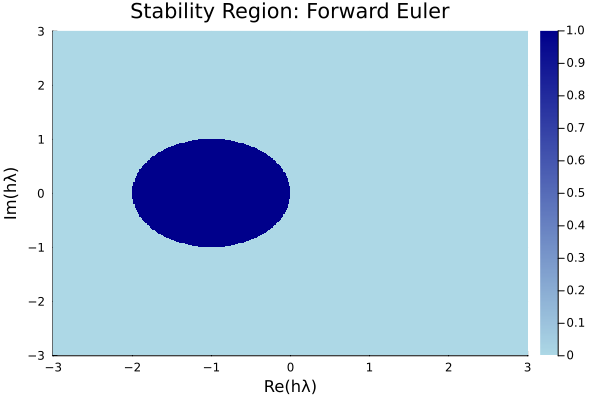

In [11]:
# 4.3 Example: Plot Stability Region for Forward Euler
using Plots

function stability_region_euler()
    xs = range(-3, 3, length=400)
    ys = range(-3, 3, length=400)
    Z = [abs(1 + (x + im*y)) <= 1 ? 1 : 0 for y in ys, x in xs]
    heatmap(xs, ys, Z, c=:blues, xlabel="Re(hλ)", ylabel="Im(hλ)",
        title="Stability Region: Forward Euler")
end

stability_region_euler()

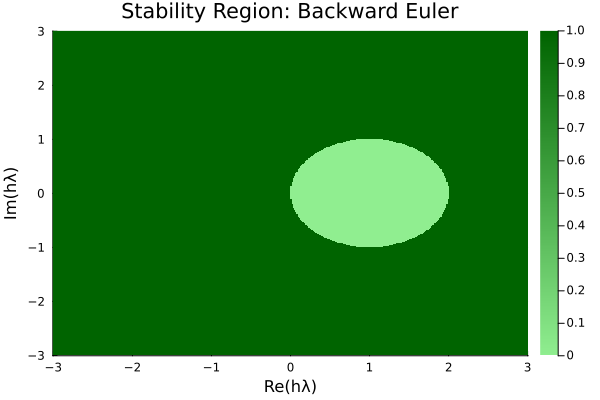

In [12]:
# 4.3 Example: Plot Stability Region for Backward Euler
function stability_region_backward_euler()
    xs = range(-3, 3, length=400)
    ys = range(-3, 3, length=400)
    Z = [abs(1 / (1 - (x + im*y))) <= 1 ? 1 : 0 for y in ys, x in xs]
    heatmap(xs, ys, Z, c=:greens, xlabel="Re(hλ)", ylabel="Im(hλ)",
        title="Stability Region: Backward Euler")
end

stability_region_backward_euler()

### 4.4 Consistency, Stability, and Convergence (Lax Equivalence)

- **Consistency**  
  The method’s local truncation error tends to 0 as $h \to 0$.  
  (Method reproduces the differential equation in the limit.)

- **Stability**  
  Errors do not grow uncontrollably during the iteration.

- **Convergence**  
  Numerical solution approaches the true solution as $h \to 0$.

- **Lax Equivalence Theorem**  
  For a well-posed linear initial value problem:  
  *Consistency + Stability ⇒ Convergence*.

## 5. Stiff ODEs

### 5.1 Definition and Examples

- **Stiff ODE**  
  An ODE where certain components decay much faster than others, forcing explicit methods to take very small time steps for stability, even when the solution varies slowly.

- **Example:**
  $ y' = -1000y + \sin t, \quad y(0) = 0 $  
  Analytical solution contains both a slow sinusoidal term and a fast-decaying exponential term $ e^{-1000t} $.

- **Test for stiffness:**  
  If the eigenvalues of the Jacobian $ \frac{\partial f}{\partial y} $ have very large negative real parts, the system is likely stiff.

In [13]:
# 5.1 Example: Stiff ODE with explicit Euler
function euler(f, t0, y0, h, steps)
    t = [t0 + i*h for i in 0:steps]
    y = zeros(Float64, steps+1)
    y[1] = y0
    for n in 1:steps
        y[n+1] = y[n] + h * f(t[n], y[n])
    end
    return t, y
end

f(t, y) = -1000y + sin(t)  # stiff system
t, y = euler(f, 0.0, 0.0, 0.0001, 50)  # very small h needed

for (ti, yi) in zip(t, y)
    println("t = $ti, y ≈ $yi")
end

t = 0.0, y ≈ 0.0
t = 0.0001, y ≈ 0.0
t = 0.0002, y ≈ 9.999999983333335e-9
t = 0.00030000000000000003, y ≈ 2.8999999851666672e-8
t = 0.0004, y ≈ 5.609999941650001e-8
t = 0.0005, y ≈ 9.048999840818336e-8
t = 0.0006000000000000001, y ≈ 1.3144099648403171e-7
t = 0.0007, y ≈ 1.782968932356286e-7
t = 0.0008, y ≈ 2.3046719819539922e-7
t = 0.0009000000000000001, y ≈ 2.874204698425262e-7
t = 0.001, y ≈ 3.486784107082741e-7
t = 0.0011, y ≈ 4.138105529707809e-7
t = 0.0012000000000000001, y ≈ 4.824294754903708e-7
t = 0.0013000000000000002, y ≈ 5.541864991413358e-7
t = 0.0014, y ≈ 6.287678126105386e-7
t = 0.0015, y ≈ 7.058909856161559e-7
t = 0.0016, y ≈ 7.853018308045466e-7
t = 0.0017000000000000001, y ≈ 8.66771579457434e-7
t = 0.0018000000000000002, y ≈ 9.500943396283692e-7
t = 0.0019, y ≈ 1.035084808465548e-6
t = 0.002, y ≈ 1.1215762133023471e-6
t = 0.0021000000000000003, y ≈ 1.2094184586388058e-6
t = 0.0022, y ≈ 1.2984764584249593e-6
t = 0.0023, y ≈ 1.3886286351158397e-6
t = 0.002400000000000000

### 5.2 Why Explicit Methods Fail

- Explicit methods (e.g., Forward Euler) have stability restrictions:  
  For $ y' = \lambda y $ with $\text{Re}(\lambda) \ll 0$, stability requires  
  $ h < \frac{2}{|\lambda|} $ for Euler’s method.

- In stiff problems, $|\lambda|$ can be huge, forcing $h$ to be tiny → very slow computation.

- The problem is **stability**, not accuracy: the small step size is needed to avoid blow-up.

### 5.3 Implicit Methods for Stiff Systems

- Implicit methods (e.g., Backward Euler, BDF) are **A-stable**, allowing large time steps without instability.

- **Backward Euler for $y' = f(t, y)$:**  
  $ y_{n+1} = y_n + h \, f(t_{n+1}, y_{n+1}) $  
  This requires solving a nonlinear equation for $y_{n+1}$ at each step.

- Trade-off: each step is more expensive (requires solving equations) but allows much larger $h$.

In [14]:
# 5.3 Backward Euler for stiff ODE
function backward_euler_newton(f, J, t0, y0, h, steps; tol=1e-10, maxiter=20)
    t = [t0 + i*h for i in 0:steps]
    y = zeros(Float64, steps+1)
    y[1] = y0
    I = 1.0  # identity for scalar case

    for n in 1:steps
        y_guess = y[n]  # initial guess
        for _ in 1:maxiter
            g = y_guess - y[n] - h * f(t[n+1], y_guess)
            dg = 1.0 - h * J(t[n+1], y_guess)
            y_new = y_guess - g / dg
            if abs(y_new - y_guess) < tol
                y_guess = y_new
                break
            end
            y_guess = y_new
        end
        y[n+1] = y_guess
    end
    return t, y
end

f(t, y) = -1000y + sin(t)
J(t, y) = -1000  # derivative wrt y

t, y = backward_euler_newton(f, J, 0.0, 0.0, 0.1, 20)

for (ti, yi) in zip(t, y)
    println("t = $ti, y ≈ $yi")
end

t = 0.0, y ≈ 0.0
t = 0.1, y ≈ 9.884496697705758e-5
t = 0.2, y ≈ 0.0001976809707572592
t = 0.30000000000000004, y ≈ 0.00029455150135535864
t = 0.4, y ≈ 0.00038847906665564764
t = 0.5, y ≈ 0.0004785250784859005
t = 0.6000000000000001, y ≈ 0.0005637898259206876
t = 0.7000000000000001, y ≈ 0.000643421371779107
t = 0.8, y ≈ 0.0007166240639775386
t = 0.9, y ≈ 0.0007826664854131276
t = 1.0, y ≈ 0.0008408887620416117
t = 1.1, y ≈ 0.000890709156120645
t = 1.2000000000000002, y ≈ 0.0009316298787410227
t = 1.3, y ≈ 0.000963242063568914
t = 1.4000000000000001, y ≈ 0.0009852298521031183
t = 1.5, y ≈ 0.0009973735496287975
t = 1.6, y ≈ 0.0009995518203344486
t = 1.7000000000000002, y ≈ 0.000991742899659221
t = 1.8, y ≈ 0.0009740248117572152
t = 1.9000000000000001, y ≈ 0.0009465745899059273
t = 2.0, y ≈ 0.0009096665076482584


### 5.4 Newton Iteration & Jacobians

- For nonlinear $f(t, y)$ in implicit methods, solve  
  $ g(y_{n+1}) = y_{n+1} - y_n - h \, f(t_{n+1}, y_{n+1}) = 0 $

- **Newton iteration:**
  $ y_{n+1}^{(k+1)} = y_{n+1}^{(k)} - \left[ I - h \frac{\partial f}{\partial y}(t_{n+1}, y_{n+1}^{(k)}) \right]^{-1} g(y_{n+1}^{(k)}) $

- The Jacobian $J = \frac{\partial f}{\partial y}$ is essential for convergence speed.

- In large systems, solve the linear system  
  $ \left( I - h J \right) \delta = -g $  
  instead of explicitly computing the inverse.

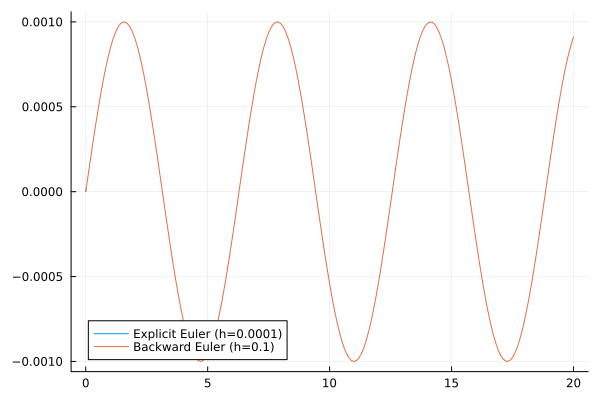

In [15]:
# 5.4 Compare explicit vs implicit for stiff ODE
using Plots

f(t, y) = -1000y + sin(t)
J(t, y) = -1000

t_exp, y_exp = euler(f, 0.0, 0.0, 0.0001, 200)  # tiny step for stability
t_imp, y_imp = backward_euler_newton(f, J, 0.0, 0.0, 0.1, 200)  # large step possible

plot(t_exp, y_exp, label="Explicit Euler (h=0.0001)")
plot!(t_imp, y_imp, label="Backward Euler (h=0.1)")

## 6. Systems of ODEs

### 6.1 Vector–Matrix Formulation

A system of $n$ first-order ODEs can be written as:

$ \mathbf{y}'(t) = \mathbf{f}(t, \mathbf{y}(t)), \quad \mathbf{y}(t) \in \mathbb{R}^n $

Example (linear system):

$ \mathbf{y}' = A \mathbf{y}, \quad A \in \mathbb{R}^{n \times n} $

Solution (if $A$ constant):

$ \mathbf{y}(t) = e^{At} \mathbf{y}_0 $

### 6.2 Reduction of Higher-Order ODEs

Any $n$-th order ODE can be rewritten as a system of $n$ first-order ODEs.

Example: $ y'' + y = 0 $

Let $ y_1 = y $, $ y_2 = y' $. Then:

$ y_1' = y_2 $

$ y_2' = -y_1 $

This is now a system:

$ \mathbf{y}' = \begin{bmatrix} y_2 \\ -y_1 \end{bmatrix} $

### 6.3 Example: Tumbling Box Problem

Describes free rotation of a rigid body with principal moments of inertia $I_1, I_2, I_3$:

$ \begin{aligned}
\dot{\omega}_1 &= \frac{I_2 - I_3}{I_1} \omega_2 \omega_3 \\
\dot{\omega}_2 &= \frac{I_3 - I_1}{I_2} \omega_3 \omega_1 \\
\dot{\omega}_3 &= \frac{I_1 - I_2}{I_3} \omega_1 \omega_2
\end{aligned} $

This system exhibits intermediate-axis instability.

In [16]:
# 6.3 Tumbling Box Problem
function tumbling_box!(du, u, p, t)
    I1, I2, I3 = p
    ω1, ω2, ω3 = u
    du[1] = (I2 - I3)/I1 * ω2 * ω3
    du[2] = (I3 - I1)/I2 * ω3 * ω1
    du[3] = (I1 - I2)/I3 * ω1 * ω2
end

using DifferentialEquations

u0 = [1.0, 0.5, 0.0]
p = (2.0, 1.0, 0.5)
tspan = (0.0, 20.0)

prob = ODEProblem(tumbling_box!, u0, tspan, p)
sol = solve(prob)

retcode: Success
Interpolation: 3rd order Hermite
t: 49-element Vector{Float64}:
  0.0
  0.0014120959471950914
  0.015533055419146005
  0.0770158153582027
  0.1957102554812973
  0.35963541533048915
  0.5686564858834673
  0.8224391499513874
  1.0999597771301608
  1.3887988921080066
  ⋮
 16.18727065767238
 16.70988399960032
 17.219584596418915
 17.73071715726579
 18.244165358578062
 18.729477089115584
 19.266429599828438
 19.75561844630029
 20.0
u: 49-element Vector{Vector{Float64}}:
 [1.0, 0.5, 0.0]
 [1.0000001246256893, 0.4999985044893982, 0.0014120945979863022]
 [1.0000150761380011, 0.4998190522381575, 0.015531259650394006]
 [1.0003685433942713, 0.49555692342136987, 0.07679701055878312]
 [1.0023044085854598, 0.47150316984574014, 0.19212759594933718]
 [1.007096225332498, 0.4056392964472033, 0.33755347187983475]
 [1.0144644483094214, 0.27417522989809123, 0.48280842823067516]
 [1.0202621766886422, 0.066289475466631, 0.5722540409012417]
 [1.018121102382313, -0.17487817934540317, 0.5408859

### 6.4 Example: Predator–Prey (Lotka–Volterra)

$ \begin{aligned}
\dot{x} &= \alpha x - \beta x y \\
\dot{y} &= \delta x y - \gamma y
\end{aligned} $

- $x(t)$: prey population  
- $y(t)$: predator population  
- $\alpha, \beta, \delta, \gamma$: positive parameters

In [17]:
# 6.4 Predator–Prey (Lotka–Volterra)
function lotka_volterra!(du, u, p, t)
    α, β, δ, γ = p
    x, y = u
    du[1] = α*x - β*x*y
    du[2] = δ*x*y - γ*y
end

u0 = [10.0, 5.0]
p = (1.5, 1.0, 1.0, 3.0)
tspan = (0.0, 20.0)

prob = ODEProblem(lotka_volterra!, u0, tspan, p)
sol = solve(prob)

retcode: Success
Interpolation: 3rd order Hermite
t: 91-element Vector{Float64}:
  0.0
  0.05573716780399099
  0.10744981967460983
  0.17129821961758318
  0.24857264989606848
  0.33212000497641503
  0.42179623003071237
  0.5416044008072944
  0.6675649443032836
  0.8093138410558282
  ⋮
 17.959812860007542
 18.133477765958812
 18.347264352124338
 18.581397936546153
 18.826911902395857
 19.092104798419182
 19.378182920540734
 19.705011838972126
 20.0
u: 91-element Vector{Vector{Float64}}:
 [10.0, 5.0]
 [7.787397549065658, 6.958061128011912]
 [5.6397686891556456, 8.424580727697514]
 [3.506059424745728, 9.276778070712544]
 [1.9277494388305152, 9.018368184886555]
 [1.0733067950487538, 7.92173259728126]
 [0.64247538443951, 6.521420891451173]
 [0.39080777561915236, 4.832267673112667]
 [0.28138868391915567, 3.4514339283320186]
 [0.2320425461611423, 2.3381174569477436]
 ⋮
 [0.2426118694149389, 2.7415471533424554]
 [0.21573391322750246, 1.6933067397277088]
 [0.2263202934458455, 0.9342045994625886

### 6.5 Example: Lorenz Attractor

$ \begin{aligned}
\dot{x} &= \sigma (y - x) \\
\dot{y} &= x(\rho - z) - y \\
\dot{z} &= xy - \beta z
\end{aligned} $

Classic example of deterministic chaos.

In [18]:
# 6.5 Lorenz Attractor
function lorenz!(du, u, p, t)
    σ, ρ, β = p
    x, y, z = u
    du[1] = σ * (y - x)
    du[2] = x * (ρ - z) - y
    du[3] = x*y - β*z
end

u0 = [1.0, 1.0, 1.0]
p = (10.0, 28.0, 8/3)
tspan = (0.0, 50.0)

prob = ODEProblem(lorenz!, u0, tspan, p)
sol = solve(prob)

retcode: Success
Interpolation: 3rd order Hermite
t: 640-element Vector{Float64}:
  0.0
  0.03663019341700964
  0.06093468866384321
  0.10228521636977828
  0.14389478542296003
  0.19115878325908742
  0.23901942198740847
  0.28968074239957237
  0.3416982456707719
  0.3889950726492698
  ⋮
 49.46410717257889
 49.550672078020746
 49.63129355498524
 49.705136411173235
 49.77116805127087
 49.83485082633763
 49.89507385470427
 49.963084626989904
 50.0
u: 640-element Vector{Vector{Float64}}:
 [1.0, 1.0, 1.0]
 [1.157692429003651, 1.988597542830071, 0.9623343014998667]
 [1.4220993217140343, 2.7717261573877385, 0.9738326398955913]
 [2.187333820038605, 4.593717871618701, 1.1294370438001131]
 [3.4873446625645927, 7.432324440796606, 1.6764582863658433]
 [5.933997992265369, 12.516655567542413, 3.5475062246304163]
 [9.902137466986968, 19.93003724916301, 8.908691204875371]
 [15.557122492989471, 26.845673349875682, 22.370474755396064]
 [19.530595626985242, 21.203237881446746, 41.711628329058584]
 [16.84

### 6.6 Example: Van der Pol Oscillator

$ y'' - \mu (1 - y^2) y' + y = 0 $

Convert to system:

$ y_1' = y_2 $

$ y_2' = \mu (1 - y_1^2) y_2 - y_1 $

In [19]:
# 6.6 Van der Pol Oscillator
function vdp!(du, u, p, t)
    μ = p
    y1, y2 = u
    du[1] = y2
    du[2] = μ*(1 - y1^2)*y2 - y1
end

u0 = [2.0, 0.0]
p = 1.0
tspan = (0.0, 20.0)

prob = ODEProblem(vdp!, u0, tspan, p)
sol = solve(prob)

retcode: Success
Interpolation: 3rd order Hermite
t: 57-element Vector{Float64}:
  0.0
  0.0004997501249375313
  0.005497251374312844
  0.03218944729970929
  0.08789038934794736
  0.16758194818862682
  0.2709662114756052
  0.4054164550002246
  0.5769925612469111
  0.8023395609776125
  ⋮
 16.761335506009765
 17.073051188214343
 17.401144911956102
 17.85810197420248
 18.386908652393778
 18.943132610582413
 19.34089258837236
 19.732817617737947
 20.0
u: 57-element Vector{Vector{Float64}}:
 [2.0, 0.0]
 [1.9999997503745837, -0.0009987513321622306]
 [1.9999699457439597, -0.010904286639423314]
 [1.9989964761962125, -0.06135948297205548]
 [1.9929144583545069, -0.1544123562950172]
 [1.9761029249482496, -0.2632211909813036]
 [1.94300455088991, -0.3719074437949509]
 [1.8856066789425578, -0.4764874162326421]
 [1.7949411966438256, -0.5760330066053637]
 [1.6527359206705003, -0.6843372758760875]
 ⋮
 [-1.9901145229895487, 0.22052181990677214]
 [-1.8717750349497007, 0.5018248866934201]
 [-1.67836547667

## 7. Long-term Behavior

### 7.1 Conservation Properties (Energy, Momentum)

- Many physical systems have conserved quantities:
  - **Energy:** e.g., simple harmonic oscillator $E = \frac{1}{2} m v^2 + \frac{1}{2} k x^2$
  - **Momentum:** conserved in systems with translational symmetry
  - **Angular Momentum:** conserved in rotationally symmetric systems

- Good numerical methods should preserve these invariants over long times.
  - Standard explicit methods (e.g., Euler) may cause drift in energy.
  - Special-purpose methods (e.g., symplectic integrators) preserve invariants better.

In [20]:
# 7.1 Energy conservation example: Simple harmonic oscillator
function sho_euler(f, t0, y0, h, steps)
    t = [t0 + i*h for i in 0:steps]
    y = zeros(Float64, length(y0), steps+1)
    y[:,1] = y0
    for n in 1:steps
        y[:,n+1] = y[:,n] + h * f(t[n], y[:,n])
    end
    return t, y
end

# SHO in first-order form: q' = p, p' = -q
function sho!(t, u)
    q, p = u
    return [p, -q]
end

y0 = [1.0, 0.0]   # initial position 1, velocity 0
t, y = sho_euler(sho!, 0.0, y0, 0.1, 200)

# Energy computation
energy = 0.5 .* (y[2,:].^2 + y[1,:].^2)

201-element Vector{Float64}:
 0.5
 0.505
 0.51005
 0.5151505
 0.5203020049999999
 0.52550502505
 0.5307600753005
 0.536067676053505
 0.5414283528140401
 0.5468426363421806
 ⋮
 3.378109870773018
 3.4118909694807487
 3.4460098791755556
 3.4804699779673114
 3.515274677746984
 3.5504274245244547
 3.5859316987696985
 3.6217910157573954
 3.6580089259149693

### 7.2 Symplectic Integrators

- Designed for **Hamiltonian systems**:

  $ \dot{q} = \frac{\partial H}{\partial p}, \quad \dot{p} = -\frac{\partial H}{\partial q} $

- **Symplectic Euler (semi-implicit Euler):**
  $ p_{n+1} = p_n - h \frac{\partial H}{\partial q}(q_n, p_n) $
  $ q_{n+1} = q_n + h \frac{\partial H}{\partial p}(q_n, p_{n+1}) $

- Preserves phase-space volume and exhibits bounded energy error over long times.

- Common choices:
  - Symplectic Euler (1st order)
  - Stormer–Verlet / Leapfrog (2nd order)

In [21]:
# 7.2 Symplectic Euler for SHO
function symplectic_euler(t0, q0, p0, h, steps)
    t = [t0 + i*h for i in 0:steps]
    q = zeros(Float64, steps+1)
    p = zeros(Float64, steps+1)
    q[1], p[1] = q0, p0
    for n in 1:steps
        p[n+1] = p[n] - h * q[n]
        q[n+1] = q[n] + h * p[n+1]
    end
    return t, q, p
end

t, q, p = symplectic_euler(0.0, 1.0, 0.0, 0.1, 200)
energy_sym = 0.5 .* (p.^2 + q.^2)

201-element Vector{Float64}:
 0.5
 0.49505
 0.49034750499999996
 0.48608014455049997
 0.482418186333435
 0.479507742481666
 0.47746493970487847
 0.4763712858338664
 0.476270417658083
 0.477166359817742
 ⋮
 0.4838615076465608
 0.48062175316864764
 0.47820519073930534
 0.47670824119946487
 0.47619063283576574
 0.47667301822191954
 0.4781361501810186
 0.48052164974789513
 0.48373433548983064

### 7.3 Chaotic Systems and Sensitivity to Initial Conditions

- **Chaotic systems**:
  - Deterministic but unpredictable long-term behavior
  - Small changes in initial conditions lead to large differences in trajectories

- Measured using **Lyapunov exponents**:
  - Positive exponent ⇒ exponential divergence of nearby trajectories

- Example: Lorenz attractor
  - Two trajectories with nearly identical initial conditions diverge quickly
  - Yet both remain on the same strange attractor in phase space

In [22]:
# 7.3 Chaotic divergence: Lorenz attractor with nearby initial conditions
using DifferentialEquations

function lorenz!(du, u, p, t)
    σ, ρ, β = p
    x, y, z = u
    du[1] = σ * (y - x)
    du[2] = x * (ρ - z) - y
    du[3] = x*y - β*z
end

p = (10.0, 28.0, 8/3)
u0_a = [1.0, 1.0, 1.0]
u0_b = [1.0001, 1.0, 1.0]
tspan = (0.0, 20.0)

prob_a = ODEProblem(lorenz!, u0_a, tspan, p)
prob_b = ODEProblem(lorenz!, u0_b, tspan, p)

sol_a = solve(prob_a, Tsit5())
sol_b = solve(prob_b, Tsit5())

# Difference over time
diff = [norm(sol_a(t) - sol_b(t)) for t in 0:0.01:20]

UndefVarError: UndefVarError: `norm` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: a global variable of this name may be made accessible by importing LinearAlgebra in the current active module Main
Hint: a global variable of this name may be made accessible by importing ColorVectorSpace in the current active module Main

## 8. Case Studies & Applications

### 8.1 Compare Methods on Test Problems

- **Goal:** Evaluate numerical methods on problems with known analytical solutions.
- **Typical test equations:**
  - $y' = -2y, \quad y(0) = 1$ (simple exponential decay)
  - $y' = -1000y + \sin t$ (stiff)
  - Harmonic oscillator $q'' + q = 0$
- **Metrics to compare:**
  - **Accuracy:** Global error at final time vs. exact solution
  - **Stability:** Maximum step size before instability
  - **Energy conservation:** For oscillatory systems

In [23]:
# 8.1 Compare methods on y' = -2y
f(t, y) = -2y
exact(t) = exp(-2t)

function euler(f, t0, y0, h, steps)
    t = [t0 + i*h for i in 0:steps]
    y = zeros(Float64, steps+1)
    y[1] = y0
    for n in 1:steps
        y[n+1] = y[n] + h * f(t[n], y[n])
    end
    return t, y
end

function rk4(f, t0, y0, h, steps)
    t = [t0 + i*h for i in 0:steps]
    y = zeros(Float64, steps+1)
    y[1] = y0
    for n in 1:steps
        k1 = f(t[n], y[n])
        k2 = f(t[n] + h/2, y[n] + h/2 * k1)
        k3 = f(t[n] + h/2, y[n] + h/2 * k2)
        k4 = f(t[n] + h, y[n] + h * k3)
        y[n+1] = y[n] + h/6 * (k1 + 2k2 + 2k3 + k4)
    end
    return t, y
end

h = 0.1
t_eu, y_eu = euler(f, 0.0, 1.0, h, 50)
t_rk, y_rk = rk4(f, 0.0, 1.0, h, 50)

errors_eu = abs.(y_eu .- exact.(t_eu))
errors_rk = abs.(y_rk .- exact.(t_rk))

println("Euler final error: ", errors_eu[end])
println("RK4 final error: ", errors_rk[end])

Euler final error: 3.112745283542525e-5
RK4 final error: 7.154516712503235e-9


### 8.2 Computational Efficiency vs. Accuracy

- **Efficiency**: measured as CPU time or number of function evaluations.
- **Accuracy**: measured as global error.
- **Trade-off:** Higher-order methods require more work per step but allow larger steps for same accuracy.
- **Strategy:**
  - Use low-order methods for cheap, low-accuracy needs.
  - Use high-order/adaptive methods for high-accuracy or long-term simulations.
- **Visualization:**
  - Plot error vs. CPU time for different methods on the same problem.

In [24]:
# 8.2 Efficiency vs Accuracy for varying h
using BenchmarkTools

hs = [0.2, 0.1, 0.05, 0.025]
final_time = 10.0

function run_and_measure(method, f, exact, h)
    steps = Int(final_time / h)
    t_start = time()
    t, y = method(f, 0.0, 1.0, h, steps)
    elapsed = time() - t_start
    err = abs(y[end] - exact(t[end]))
    return elapsed, err
end

results_eu = [run_and_measure(euler, f, exact, h) for h in hs]
results_rk = [run_and_measure(rk4, f, exact, h) for h in hs]

println("h\tEuler_time\tEuler_err\tRK4_time\tRK4_err")
for i in 1:length(hs)
    println("$(hs[i])\t$(results_eu[i][1])\t$(results_eu[i][2])\t$(results_rk[i][1])\t$(results_rk[i][2])")
end

h	Euler_time	Euler_err	RK4_time	RK4_err
0.2	2.1457672119140625e-6	2.0530708096639102e-9	2.86102294921875e-6	1.2328432593319513e-11
0.1	1.9073486328125e-6	1.857450024805109e-9	1.1920928955078125e-6	6.4968029957402e-13
0.05	1.1920928955078125e-6	1.3556457115730253e-9	2.86102294921875e-6	3.7341957388576994e-14
0.025	1.9073486328125e-6	8.324642112867603e-10	5.0067901611328125e-6	2.2384413001970873e-15
